### Домашнее задание 2 Кузнецова Светлана Б06-905 Вариант 26

P.S. Часть кода (например, реализация некоторых методов в задаче 1) была взята у Луппова Д. 

### Задача 1 

1. Дифференциальное уравнение вида:
\begin{equation}
    x^2\frac{d^2y}{dx^2} + x\frac{dy}{dx} + (x^2 - \alpha^2)y = 0
\end{equation}
где для $\alpha = 1/2$ эквивалентно системе: 
\begin{equation}
    \frac{dy}{dx} = \nu
\end{equation}
\begin{equation}
    \frac{d \nu}{dx} =  \left( \frac{1}{4x^2} - 1 \right) y - \frac{\nu}{x}
\end{equation}
Начальные условия: $y(0) = 0$, $\displaystyle \lim_{x \to 0} \nu (x) \sqrt x = 1$  
Численное решение ищется явным, неявным и с центральной точкой методами Эйлера, методом трапеции, методами Рунге-Кутты порядков аппроксимации 2, 3, 4 на отрезуке $x \in [0,20]$  

##### Заменим второе начальное условие следующим образом (замена требуется, тк иначе непонятно, как проверять это начальное условие):
В качестве $x_{0}$ возьмем точку, близкую к 0. Пусть $x_{0} = 0.01$ Тогда из первого уравнения эквивалентной системы получим, что $y(x) \approx 2x^{1/2}$ , а значит $y(x_{0}) = 0.2$. Из второго начального условия (которое мы заменяем) видно, что $\nu(x) \approx x^{-1/2}$, тогда $\nu(x_{0}) = 10$

In [53]:
#импорт необходимых библиотек 
import numpy as np #операции из линейной алгебры
import pandas as pd #таблицы
import matplotlib.pyplot as plt #графики
import scipy
from scipy import special as sci #для точного решения Бесселя

plt.style.use('seaborn')

Для начала зададим функцию, которая будет возвращать нам вторую производную (второе уравнение эквивалентной системы) (сделано просто для удобства)

In [54]:
def func (x, y, v):
    return (1/(4*x**2) - 1)*y - v/x

#### Реализация явного метода Эйлера 

In [55]:
def expl_eler(x0, y0, v0, h):
    y_arr = [y0]
    v_arr = [v0]
    x_arr = [x0]
    while x_arr[-1] < 20:
        y = y_arr[-1] + h*v_arr[-1]
        v = ((1/(4*x_arr[-1]**2)-1)*y_arr[-1] - v_arr[-1]/x_arr[-1])*h + v_arr[-1]
        x = x_arr[-1] + h
        y_arr.append(y)
        x_arr.append(x)
        v_arr.append(v)
    return (v_arr, y_arr, x_arr)

#### Реализация неявного метода Эйлера 

In [56]:
def impl_eler(x0, y0, v0, h):
    y1_arr = [y0]
    v1_arr = [v0]
    x1_arr = [x0]
    while x1_arr[-1] < 20:
        x1_arr.append(x1_arr[-1] + h)
        v1 = (v1_arr[-1]/h + (1/(4*x1_arr[-1]**2) - 1)*y1_arr[-1])/(1/h + 1/x1_arr[-1] - 
                                                                    h/(4*x1_arr[-1]**2) + h)
        y1 = v1*h + y1_arr[-1]
        v1_arr.append(v1)
        y1_arr.append(y1)
    return (v1_arr, y1_arr, x1_arr)

#### Реализация метода Эйлера с центральной точкой


In [57]:
def central_eler(x0, y0, v0, h):
    xc = [x0]
    yc = [y0]
    vc = [v0]
    while xc[-1] < 20:
        y = yc[-1] + h*(vc[-1] + h/2*func(xc[-1], yc[-1], vc[-1]))
        v = vc[-1] + h*(func(xc[-1]+ h/2, yc[-1] + h/2*vc[-1], vc[-1] 
                             + h/2*func(xc[-1], yc[-1], vc[-1])))
        x = xc[-1] + h
        yc.append(y)
        xc.append(x)
        vc.append(v)
    return (vc, yc, xc)

#### Реализация метода трапеции

In [58]:
def trapezoid_method(x0, y0, v0, h):
    l = len(impl_eler(x0, y0, v0, h)[2])
    xe = expl_eler(x0, y0, v0, h)[2]
    ye = expl_eler(x0, y0, v0, h)[1]
    ve = expl_eler(x0, y0, v0, h)[0]
    xne = impl_eler(x0, y0, v0, h)[2]
    yne = impl_eler(x0, y0, v0, h)[1]
    vne = impl_eler(x0, y0, v0, h)[0]
    xt = xe
    yt = [0 for i in range (l)]
    vt = [0 for i in range (l)]
    for i in range (l):
        yt[i] = 1/2*(ye[i] + yne[i])
        vt[i] = 1/2*(ve[i] + vne[i])
    return (vt, yt, xt)

#### Точное решение уравнения Бесселя порядка $\frac{1}{2}$ позволяет найти функция jv() из scipy.special. Она возвращает функцию Бесселя 1 рода необходимого порядка

Теперь изобразим точное решение и решения, полученные разными методами, на одном графике:

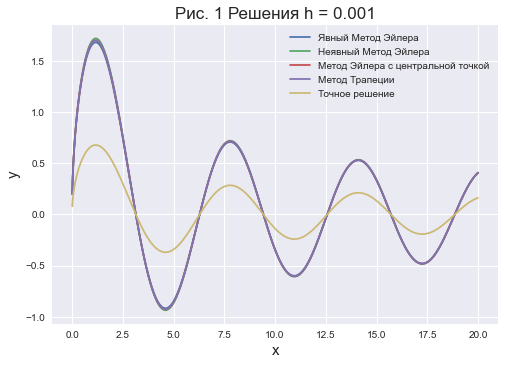

In [59]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.001
plt.plot(expl_eler(x0, y0, v0, h)[2], expl_eler(x0, y0, v0, h)[1], 
         label = "Явный Метод Эйлера")
plt.plot(impl_eler(x0, y0, v0, h)[2], impl_eler(x0, y0, v0, h)[1], 
         label = "Неявный Метод Эйлера")
plt.plot(central_eler(x0, y0, v0, h)[2], central_eler(x0, y0, v0, h)[1], 
         label = "Метод Эйлера с центральной точкой")
plt.plot(trapezoid_method(x0, y0, v0, h)[2], trapezoid_method(x0, y0, v0, h)[1], 
         label = "Метод Трапеции")
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.plot(x, sci.jv(0.5, x), label = "Точное решение")
plt.title("Рис. 1 Решения h = 0.001", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

Вероятно, точным решением нашего уравнения Бесселя будет не просто sci.jv(0.5, x), а sci.jv(0.5, x), умноженная на некий коэффициент.

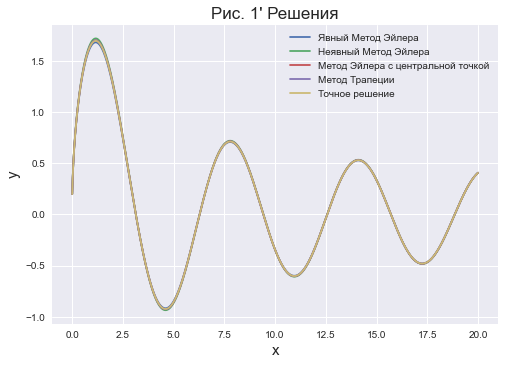

In [60]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.001
plt.plot(expl_eler(x0, y0, v0, h)[2], expl_eler(x0, y0, v0, h)[1], 
         label = "Явный Метод Эйлера")
plt.plot(impl_eler(x0, y0, v0, h)[2], impl_eler(x0, y0, v0, h)[1], 
         label = "Неявный Метод Эйлера")
plt.plot(central_eler(x0, y0, v0, h)[2], central_eler(x0, y0, v0, h)[1], 
         label = "Метод Эйлера с центральной точкой")
plt.plot(trapezoid_method(x0, y0, v0, h)[2], trapezoid_method(x0, y0, v0, h)[1], 
         label = "Метод Трапеции")
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.plot(x, 2.5*sci.jv(0.5, x), label = "Точное решение")
plt.title("Рис. 1' Решения", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

Но как найти его точно, а не взять "от балды" - мне непонятно. Поэтому, дальше точное решение я не рассматриваю. 

Точное решение хоть какое-нибудь мне было необходимо, чтобы убедиться, что нули точного решения и решений, полученных разными методами совпадают с некоторой степенью точности. При умножении sci.jv(0.5, x) на некий вещественный коэффициент, нули функции sci.jv(0.5, x) не меняются, поэтому нули точного решения мы знаем.

Итого имеем:

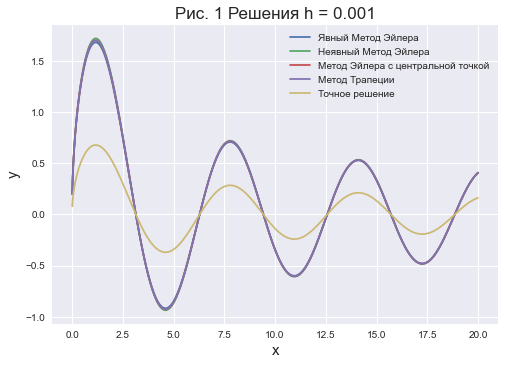

In [61]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.001
plt.plot(expl_eler(x0, y0, v0, h)[2], expl_eler(x0, y0, v0, h)[1], 
         label = "Явный Метод Эйлера")
plt.plot(impl_eler(x0, y0, v0, h)[2], impl_eler(x0, y0, v0, h)[1], 
         label = "Неявный Метод Эйлера")
plt.plot(central_eler(x0, y0, v0, h)[2], central_eler(x0, y0, v0, h)[1], 
         label = "Метод Эйлера с центральной точкой")
plt.plot(trapezoid_method(x0, y0, v0, h)[2], trapezoid_method(x0, y0, v0, h)[1], 
         label = "Метод Трапеции")
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.plot(x, sci.jv(0.5, x), label = "Точное решение")
plt.title("Рис. 1 Решения h = 0.001", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

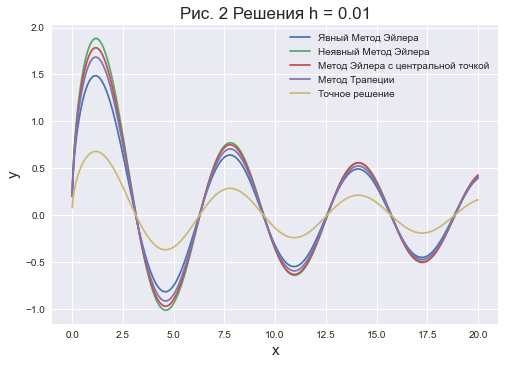

In [62]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.01
plt.plot(expl_eler(x0, y0, v0, h)[2], expl_eler(x0, y0, v0, h)[1], 
         label = "Явный Метод Эйлера")
plt.plot(impl_eler(x0, y0, v0, h)[2], impl_eler(x0, y0, v0, h)[1], 
         label = "Неявный Метод Эйлера")
plt.plot(central_eler(x0, y0, v0, h)[2], central_eler(x0, y0, v0, h)[1], 
         label = "Метод Эйлера с центральной точкой")
plt.plot(trapezoid_method(x0, y0, v0, h)[2], trapezoid_method(x0, y0, v0, h)[1], 
         label = "Метод Трапеции")
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.plot(x, sci.jv(0.5, x), label = "Точное решение")
plt.title("Рис. 2 Решения h = 0.01", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

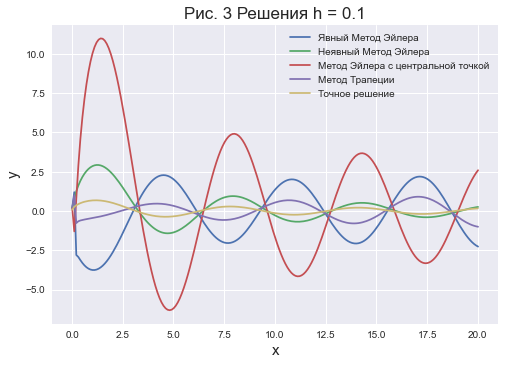

In [63]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.1
plt.plot(expl_eler(x0, y0, v0, h)[2], expl_eler(x0, y0, v0, h)[1], 
         label = "Явный Метод Эйлера")
plt.plot(impl_eler(x0, y0, v0, h)[2], impl_eler(x0, y0, v0, h)[1], 
         label = "Неявный Метод Эйлера")
plt.plot(central_eler(x0, y0, v0, h)[2], central_eler(x0, y0, v0, h)[1], 
         label = "Метод Эйлера с центральной точкой")
plt.plot(trapezoid_method(x0, y0, v0, h)[2], trapezoid_method(x0, y0, v0, h)[1], 
         label = "Метод Трапеции")
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.plot(x, sci.jv(0.5, x), label = "Точное решение")
plt.title("Рис. 3 Решения h = 0.1", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

#### Теперь найдем решения методами Рунге-Кутты порядков аппроксимации 2, 3 и 4.  

#### Реализация метода Рунге-Кутты порядка аппроксимации 2

Таблица Бутчера:

| 0     | 0 |      |
| :---        |    :----:   |          ---: |
| 1/2b      | 1/2b       | 0   |
|    | 1-b        | b      |

| 0     | 0 |      |
| :---        |    :----:   |          ---: |
| 1      | 1       | 0   |
|    | 1/2        | 1/2      |

In [64]:
def rk2(x0, y0, v0, h, a = 0.5):
    x2 = [x0]
    y2 = [y0]
    v2 = [v0]
    while x2[-1] < 20:
        k1 = v2[-1]
        m1 = func(x2[-1], y2[-1], v2[-1])
        k2 = v2[-1] + h/(2*a)*m1
        m2 = func(x2[-1]+h/(2*a), y2[-1] + h/(2*a)*k1, v2[-1] + h/(2*a)*m1)
        y = y2[-1] + h*((1 - a)*k1 + a*k2)
        v = v2[-1] + h*((1 - a)*m1 + a*m2)
        x2.append(x2[-1] + h)
        y2.append(y)
        v2.append(v)
    return (v2, y2, x2)

#### Реализация метода Рунге-Кутты порядка аппроксимации 3

Таблица Бутчера:

| 0     |  |      |      |
| :---        |    :----:   |    :----:   |          ---: |
| 1      | 1       |   |   |
|1/2    | 1/4       | 1/4      |   |
|    | 1/6        | 1/6      |2/3      |

In [65]:
c = [0, 1, 0.5]
b = [1/6, 1/6, 2/3]
a = [[0, 0, 0], [1, 0, 0], [1/4, 1/4, 0]]
def rk3(x0, y0, v0, h):
    x3 = [x0]
    y3 = [y0]
    v3 = [v0]
    while x3[-1] < 20:
        k = [0, 0, 0]
        m = [0, 0, 0]
        for i in range(3):
            sy = 0
            for j in range (i):
                sy += a[i][j]*k[j]
            sv = 0
            for j in range (i):
                sv += a[i][j]*m[j]
            m[i] = func(x3[-1] + c[i]*h, y3[-1] + h*sy, v3[-1] + h*sv)
            k[i] = v3[-1] + h*sv
        sm = 0
        for i in range(3):
            sm += b[i]*m[i]
        sk = 0
        for i in range(3):
            sk += b[i]*k[i]
        y = y3[-1] + h*sk
        v = v3[-1] + h*sm
        x = x3[-1] + h
        x3.append(x)
        y3.append(y)
        v3.append(v)
    return (v3, y3, x3)

#### Реализация метода Рунге-Кутты порядка аппроксимации 4

Таблица Бутчера:

| 0     |  |      |      |      |
| :---        |    :----:   |    :----:   |  :----:   |        ---: |
| 1/2      | 1/2       |   |   |      |
|1/2    | 0       | 1/2      |   |      |
|1    | 0       | 0      |1   |      |
|    | 1/6        | 1/3      |1/3      |  1/6    |

In [66]:
c4 = [0, 0.5, 0.5, 1]
b4 = [1/6, 1/3, 1/3, 1/6]
a4 = [[0, 0, 0, 0], [0.5, 0, 0, 0], [0, 0.5, 0, 0], [0, 0, 1, 0]]

def rk4(x0, y0, v0, h):
    x4 = [x0]
    y4 = [y0]
    v4 = [v0]
    while x4[-1] < 20:
        k = [0, 0, 0, 0]
        m = [0, 0, 0, 0]
        for i in range(4):
            sy = 0
            for j in range (i):
                sy += a4[i][j]*k[j]
            sv = 0
            for j in range (i):
                sv += a4[i][j]*m[j]
            m[i] = func(x4[-1] + c4[i]*h, y4[-1] + h*sy, v4[-1] + h*sv)
            k[i] = v4[-1] + h*sv
        sm = 0
        for i in range(4):
            sm += b4[i]*m[i]
        sk = 0
        for i in range(4):
            sk += b4[i]*k[i]
        y = y4[-1] + h*sk
        v = v4[-1] + h*sm
        x = x4[-1] + h
        x4.append(x)
        y4.append(y)
        v4.append(v)
    return (v4, y4, x4)

Изобразим решения методом Рунге-Кутты,разных порядков аппроксимации, на одном графике:

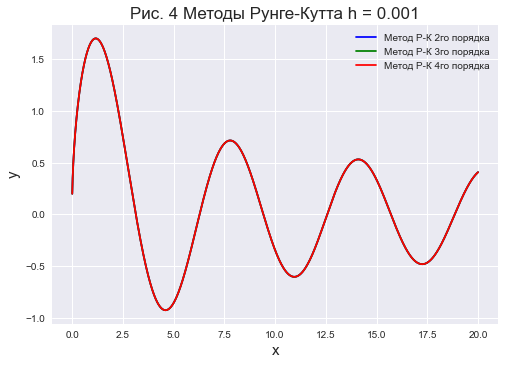

In [67]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.001
plt.plot(rk2(x0, y0, v0, h)[2], rk2(x0, y0, v0, h)[1], 
         label = "Метод Р-К 2го порядка", color = 'blue')
plt.plot(rk3(x0, y0, v0, h)[2], rk3(x0, y0, v0, h)[1], 
         label = "Метод Р-К 3го порядка", color = 'green')
plt.plot(rk4(x0, y0, v0, h)[2], rk4(x0, y0, v0, h)[1], 
         label = "Метод Р-К 4го порядка", color = 'red')
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.title("Рис. 4 Методы Рунге-Кутта h = 0.001", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

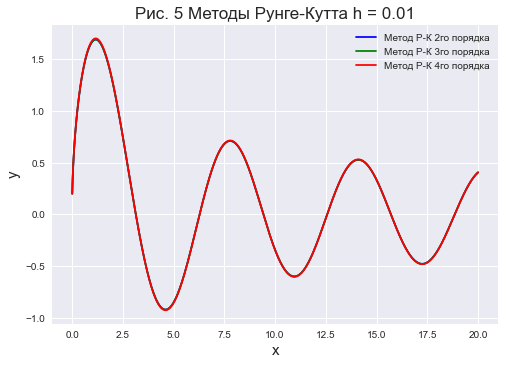

In [68]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.01
plt.plot(rk2(x0, y0, v0, h)[2], rk2(x0, y0, v0, h)[1], 
         label = "Метод Р-К 2го порядка", color = 'blue')
plt.plot(rk3(x0, y0, v0, h)[2], rk3(x0, y0, v0, h)[1], 
         label = "Метод Р-К 3го порядка", color = 'green')
plt.plot(rk4(x0, y0, v0, h)[2], rk4(x0, y0, v0, h)[1], 
         label = "Метод Р-К 4го порядка", color = 'red')
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.title("Рис. 5 Методы Рунге-Кутта h = 0.01", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

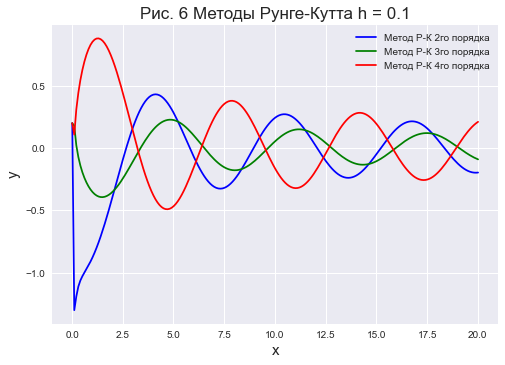

In [69]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.1
plt.plot(rk2(x0, y0, v0, h)[2], rk2(x0, y0, v0, h)[1], 
         label = "Метод Р-К 2го порядка", color = 'blue')
plt.plot(rk3(x0, y0, v0, h)[2], rk3(x0, y0, v0, h)[1], 
         label = "Метод Р-К 3го порядка", color = 'green')
plt.plot(rk4(x0, y0, v0, h)[2], rk4(x0, y0, v0, h)[1], 
         label = "Метод Р-К 4го порядка", color = 'red')
x = np.linspace(0.01, 20, int((20-0.01)/h)) #сетка
plt.title("Рис. 6 Методы Рунге-Кутта h = 0.1", fontsize = 17)
plt.xlabel("x", fontsize = 15)
plt.ylabel("y", fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

Найдем и сравним невязки Методов Эйлера и метода трапеции

<function matplotlib.pyplot.show(close=None, block=None)>

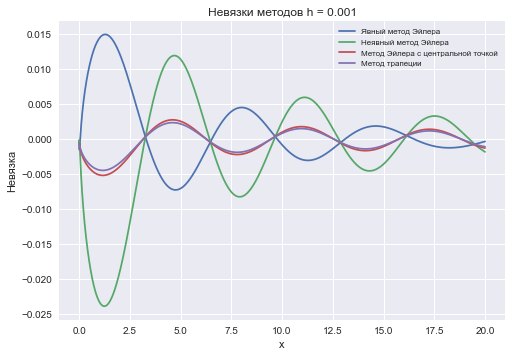

In [70]:
def nevyazki (h, x0, y0, v0, method):
    nev = []
    y = method(x0, y0, v0, h)[1]
    x = method(x0, y0, v0, h)[2]
    for i in range (len(x)):
        nev.append(2.5*sci.jv(0.5, x[i]) - y[i])
    return [nev, x]
h, x0, y0, v0 = 0.001, 0.01, 0.2, 10
plt.plot(nevyazki(h, x0, y0, v0, expl_eler)[1], 
         nevyazki(h, x0, y0, v0, expl_eler)[0], label = "Явный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, impl_eler)[1], 
         nevyazki(h, x0, y0, v0, impl_eler)[0], label = "Неявный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, central_eler)[1], 
         nevyazki(h, x0, y0, v0, central_eler)[0], label = "Метод Эйлера с центральной точкой")
plt.plot(nevyazki(h, x0, y0, v0, trapezoid_method)[1], 
         nevyazki(h, x0, y0, v0, trapezoid_method)[0], label = "Метод трапеции")
plt.legend(fontsize = 8)
plt.title("Невязки методов h = 0.001")
plt.xlabel("x")
plt.ylabel("Невязка")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

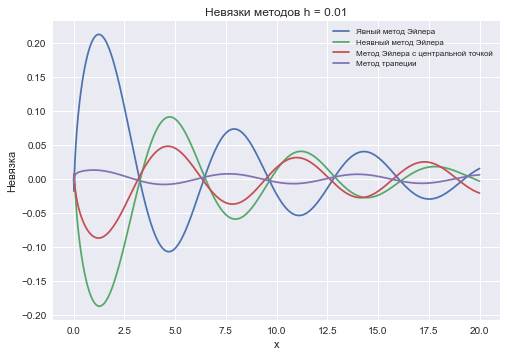

In [71]:
h, x0, y0, v0 = 0.01, 0.01, 0.2, 10
plt.plot(nevyazki(h, x0, y0, v0, expl_eler)[1], 
         nevyazki(h, x0, y0, v0, expl_eler)[0], label = "Явный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, impl_eler)[1], 
         nevyazki(h, x0, y0, v0, impl_eler)[0], label = "Неявный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, central_eler)[1], 
         nevyazki(h, x0, y0, v0, central_eler)[0], label = "Метод Эйлера с центральной точкой")
plt.plot(nevyazki(h, x0, y0, v0, trapezoid_method)[1], 
         nevyazki(h, x0, y0, v0, trapezoid_method)[0], label = "Метод трапеции")
plt.legend(fontsize = 8)
plt.title("Невязки методов h = 0.01")
plt.xlabel("x")
plt.ylabel("Невязка")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

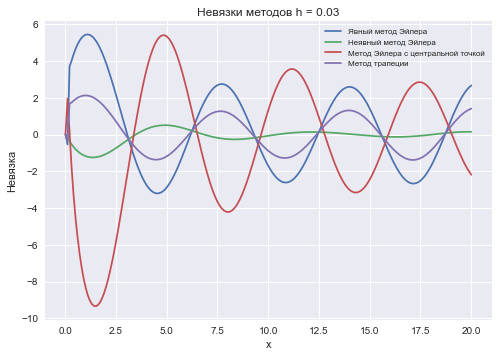

In [72]:
h, x0, y0, v0 = 0.1, 0.01, 0.2, 10
plt.plot(nevyazki(h, x0, y0, v0, expl_eler)[1], 
         nevyazki(h, x0, y0, v0, expl_eler)[0], label = "Явный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, impl_eler)[1], 
         nevyazki(h, x0, y0, v0, impl_eler)[0], label = "Неявный метод Эйлера")
plt.plot(nevyazki(h, x0, y0, v0, central_eler)[1], 
         nevyazki(h, x0, y0, v0, central_eler)[0], label = "Метод Эйлера с центральной точкой")
plt.plot(nevyazki(h, x0, y0, v0, trapezoid_method)[1], 
         nevyazki(h, x0, y0, v0, trapezoid_method)[0], label = "Метод трапеции")
plt.legend(fontsize = 8)
plt.title("Невязки методов h = 0.03")
plt.xlabel("x")
plt.ylabel("Невязка")
plt.show

### Как видно из всех построенных графиков, ВСЕ методы устойчивы. Чем меньше шаг h, тем меньше невязка в каждом методе. 

#### У метода Эйлера с центральной точкой примечательно то, что он больше всех отстоит по значению от точного решения при h = 0.1 (рис.3) Но тем не менее, он все равно устойчив для данной задачи.

####  Теперь найдем нули решения при помощи каждого метода

In [73]:
x0, y0, v0, h = 0.01, 0.2, 10, 0.001
def null_finder (x0, y0, v0, h, method):
    res = method(x0, y0, v0, h)
    nuls = [0]
    for i in range(1, len (res[2])-1):
        if (abs(res[1][i]) < 0.1) and (res[1][i]*res[1][i-1] < 0):
            nuls.append(round((res[2][i]+res[2][i+1])/2, 4))
    return (nuls)
df = pd.DataFrame(null_finder(x0, y0, v0, h, expl_eler), columns=["Явный метод Эйлера"])
df["Неявный метод Эйлера"] = null_finder(x0, y0, v0, h, impl_eler)
df["Метод Эйлера с центральной точкой"] = null_finder(x0, y0, v0, h, central_eler)
df["Метод трапеции"] = null_finder(x0, y0, v0, h, trapezoid_method)
df["Рунге-Кутте 4"] = null_finder(x0, y0, v0, h, rk4)
df["Рунге-Кутте 3"] = null_finder(x0, y0, v0, h, rk3)
df["Рунге-Кутте 2"] = null_finder(x0, y0, v0, h, rk2)
df["Точное решение"] = [None] * df.shape[0]
df

,Явный метод Эйлера,Неявный метод Эйлера,Метод Эйлера с центральной точкой,Метод трапеции,Рунге-Кутте 4,Рунге-Кутте 3,Рунге-Кутте 2,Точное решение
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,None
1,3.1415,3.1445,3.1425,3.1425,3.1425,3.1425,3.1425,None
2,6.2825,6.2855,6.2845,6.2845,6.2845,6.2845,6.2845,None
3,9.4235,9.4275,9.4255,9.4255,9.4255,9.4255,9.4255,None
4,12.5655,12.5695,12.5675,12.5675,12.5675,12.5675,12.5675,None
5,15.7065,15.7115,15.7085,15.7085,15.7085,15.7085,15.7085,None
6,18.8485,18.8525,18.8505,18.8505,18.8505,18.8505,18.8505,None


#### Найдем нули точного решения уравнения Бесселя sci.jv(0.5, x)

In [74]:
X = np.arange(0, 20.001, 0.0001)
a = sci.jv(0.5, X)
for i in range(len(a)):
    a[i] = round(a[i],4)
nuls_of_exc_solution = []
for i in range(len(X)):
    if a[i]==0:
        nuls_of_exc_solution.append(X[i])

In [75]:
nuls_of_exc_solution

[0.0,
 3.1415,
 3.1416,
 3.1417,
 6.2831,
 6.2832,
 6.2833000000000006,
 9.4246,
 9.4247,
 9.424800000000001,
 9.424900000000001,
 12.5662,
 12.5663,
 12.5664,
 12.566500000000001,
 15.7078,
 15.7079,
 15.708,
 15.7081,
 15.708200000000001,
 18.8493,
 18.8494,
 18.849500000000003,
 18.849600000000002,
 18.849700000000002,
 18.849800000000002]

In [76]:
exc_nuls = [0.0000, 3.1416, 6.2832, 9.4248, 12.5664, 15.7080, 18.8496]

#### Добавим нули точного решения в таблицу с нулями: 

In [77]:
df["Точное решение"] = exc_nuls

In [78]:
df

,Явный метод Эйлера,Неявный метод Эйлера,Метод Эйлера с центральной точкой,Метод трапеции,Рунге-Кутте 4,Рунге-Кутте 3,Рунге-Кутте 2,Точное решение
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,3.1415,3.1445,3.1425,3.1425,3.1425,3.1425,3.1425,3.1416
2,6.2825,6.2855,6.2845,6.2845,6.2845,6.2845,6.2845,6.2832
3,9.4235,9.4275,9.4255,9.4255,9.4255,9.4255,9.4255,9.4248
4,12.5655,12.5695,12.5675,12.5675,12.5675,12.5675,12.5675,12.5664
5,15.7065,15.7115,15.7085,15.7085,15.7085,15.7085,15.7085,15.7080
6,18.8485,18.8525,18.8505,18.8505,18.8505,18.8505,18.8505,18.8496


Как видно из полученной таблицы, значения всех нулей на сетке с h = 0.001 совпадают у всех методов до 4 знака. Однако, только до второго знака после запятой совпадает с нулями "точного решения". Стоит заметить, что нули т.н. точного решения я искала с помощью собственного алгоритма, а не встроенных функций. В процессе этого алгоритма я округляла, брала сетку оси х, от которой непосредственно зависит точность полученных нулей в конце. Так что считать эти нули эталонным значением точно не стоит. Но то, что они совпадают хотя бы до второго знака после запятой немного радуют. Встроенный функций в scipy для нахождения нулей функций Бесселя с ДРОБНЫМ порядком нет! Есть только для целый порядков. Поэтому мне пришлось выкручиваться вот так.